<a href="https://colab.research.google.com/github/juancuadrado/DOE_2023/blob/main/DCGL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit &>/dev/null
from bioinfokit.analys import stat as st
!pip install pingouin  &>/dev/null
import pingouin as pg

#  **Tema 5: Diseños Cuadrados Greco - Latinos - DCGL usando Python: Versión 2**

###  **Un experimentador estudia los efectos que tienen cinco Formulaciones (A, B, C, D, E) diferentes de la carga propulsora utilizada en los sistemas de expulsión de la tripulación de un avión basado en la rapidez de combustión. Cada formulación se hace con un lote de materia prima (Columnas: 1, 2, 3, 4, 5, 6) diferente que sólo alcanza para probar cinco formulaciones. Además, las formulaciones son preparadas por varios Operadores (filas: 1, 2, 3, 4, 5, 6), y puede haber diferencias sustanciales en las habilidades y experiencia en cada uno de ellos; por tanto, al parecer, hay dos factores perturbadores que serán “calculados en promedio” en dicho diseño: los lotes de materia prima y los operadores. El diseño apropiado para este problema consiste en probar cada formulación exactamente una vez en cada uno de los operadores. Para esto, se parte del diseño de un Cuadrado Latino. Luego de realizar el análisis del experimento de cuadrado latino anterior, se supone que existe un factor adicional, Los montajes de prueba (letras griegas), que podría ser importante. Este factor considera 5 montajes de prueba diferentes denotados por letras griegas. En la siguiente tabla se muestra el diseño cuadrado grecolatino resultante:**


|Operador \ Lote|	Lote 1  |Lote 2 |Lote 3 |Lote 4 |Lote 5 |
|:--:|:--:|:--:|:--:|:--:|:--:|
|Op 1	|A$\alpha$=24 |B$\gamma$=20 |C$\epsilon$=19 |D$\beta$ = 24 |E$\delta$=24|
|Op 2	|B$\beta$=17  |	C$\delta$=24|	D$\alpha$=30|E$\gamma$=27|	A$\epsilon$=36|
|Op 3	|C$\gamma$=18 |D$\epsilon$=38|E$\beta$=26|A$\delta$=27|	B$\alpha$=21|
|Op 4	|D$\delta$=26|	E$\alpha$=31|	A$\gamma$=26|B$\epsilon$=23|C$\beta$=22|
|Op 5	|E$\epsilon$=22|	A$\beta$=30|B$\delta$=20|C$\alpha$=29|	D$\gamma$=31|


* **¿Existen diferencias en los diferentes tres Formulaciones de fabricación?**
* **¿Existen diferencias en las diferentes tres Montaje experimentales?**



#FALTA LATINOS - GRECOS

- **Las hipótesis a probar: Para los tratamientos**
$$H_{01}: \mu_{T_1}=\mu_{T_2}=\mu_{T_3}=\mu_{T_4}$$ $$Vs$$ $$H_{a1}: \mu_{T_i}\neq\mu_{T_j}$$ _Al menos un tratamiento(Silos) tiene temperaturas de almacenamiento medios  diferentes_

- **Las hipótesis a probar: Para los Bloques**
$$H_{02}: \mu_{B_1}=\mu_{B_2}=\mu_{B_3}=\mu_{B_4}=\mu_{B_4}$$ $$Vs$$ $$H_{a2}: \mu_{B_i}\neq\mu_{B_j}$$  _Al menos un par de bloque (Día) tiene temperaturas de almacenamiento medios diferentes_


## **5.1 Los Datos del Problema**

In [ ]:
## **4.1 Los Datos del Problema**
Operador  =   ["Op_1", "Op_2", "Op_3", "Op_4", "Op_5"]
Lote  =  ["Lote_1","Lote_2", "Lote_3", "Lote_4", "Lote_5"]
Formulaciones = ["A", "B", "C","D","E", "B", "C", "D", "E", "A", "C", "D","E","A", "B", "D", "E", "A", "B", "C", "E", "A", "B", "C", "D"]
Montaje =['Alfa', 'Gamma', 'Epsilon',  'Beta', 'Delta','Beta', 'Delta','Alfa', 'Gamma', 'Epsilon', 'Gamma', 'Epsilon',  'Beta', 'Delta','Alfa', 'Delta','Alfa', 'Gamma', 'Epsilon', 'Beta', 'Epsilon', 'Beta', 'Delta', 'Alfa', 'Gamma']
Rapidez =[24, 20, 19, 24, 24, 17, 24, 30, 27, 36, 18, 38, 26, 27, 21, 26, 31, 26, 23,22,22,30,20,29,31]

## **5.2 Construyamos el dataFrame de los precios y productos**

In [ ]:
## **5.2 Construyamos el dataFrame de los precios y productos**
DCGL = pd.DataFrame({'Operador':np.repeat(Operador,5), 'Lote':Lote*5, 'Formulaciones':Formulaciones, 'Montaje':Montaje, 'Rapidez':Rapidez})
DCGL

,Operador,Lote,Formulaciones,Montaje,Rapidez
0,Op_1,Lote_1,A,Alfa,24
1,Op_1,Lote_2,B,Gamma,20
2,Op_1,Lote_3,C,Epsilon,19
3,Op_1,Lote_4,D,Beta,24
4,Op_1,Lote_5,E,Delta,24
5,Op_2,Lote_1,B,Beta,17
6,Op_2,Lote_2,C,Delta,24
7,Op_2,Lote_3,D,Alfa,30
8,Op_2,Lote_4,E,Gamma,27
9,Op_2,Lote_5,A,Epsilon,36


## **5.5. BoxPlot para DCL - TGP múltiple**

<Axes: title={'center': 'Rapidez vs Lote'}, xlabel='Lote', ylabel='Rapidez'>

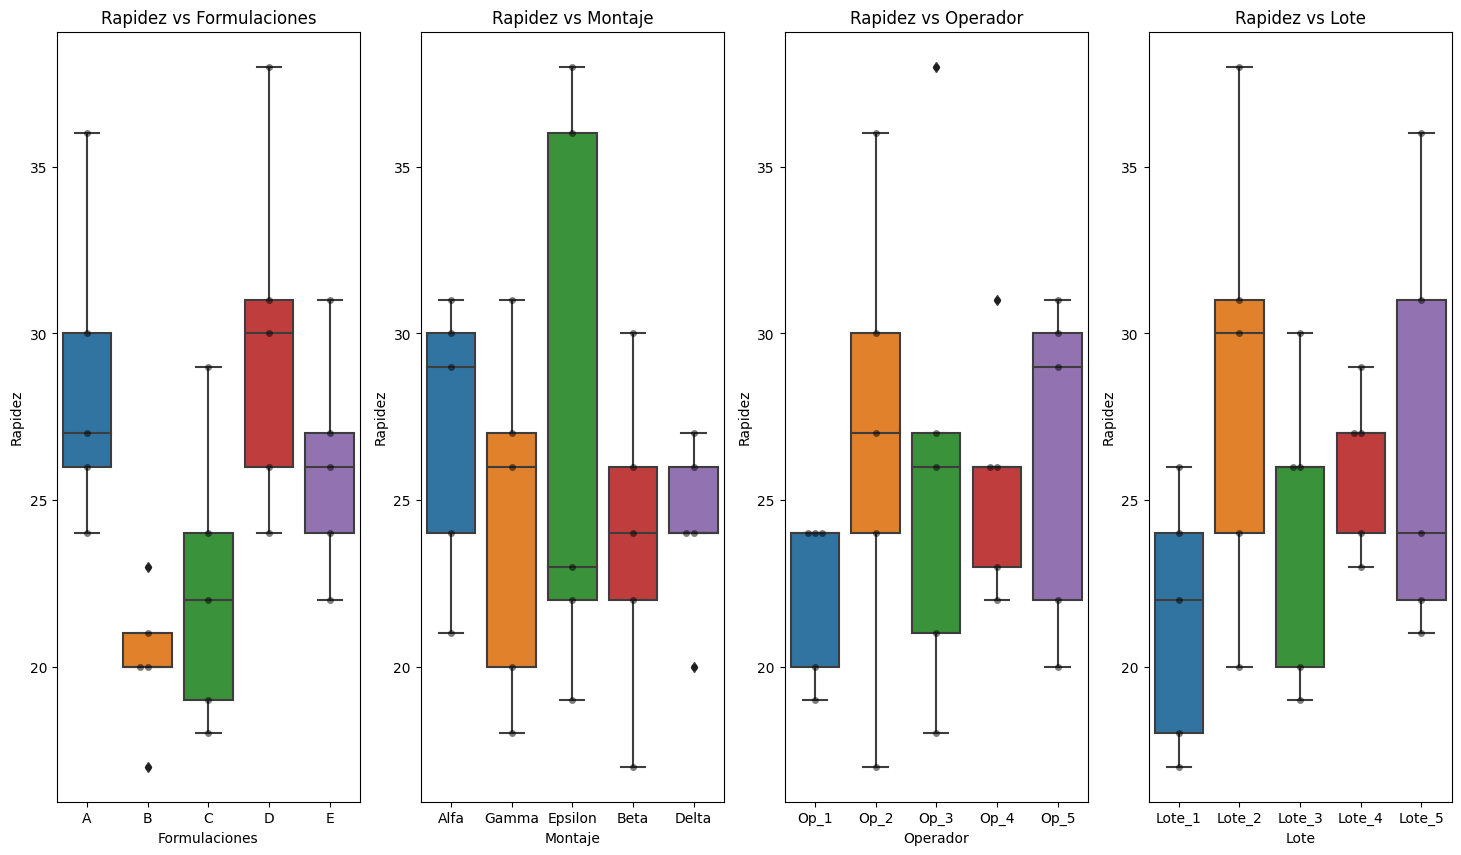

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(18, 10))
axs[0].set_title('Rapidez vs Formulaciones')
sns.boxplot(x="Formulaciones", y="Rapidez", data=DCGL, ax=axs[0])
sns.swarmplot(x="Formulaciones", y="Rapidez", data=DCGL, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Rapidez vs Montaje')
sns.boxplot(x="Montaje", y="Rapidez", data=DCGL, ax=axs[1])
sns.swarmplot(x="Montaje", y="Rapidez", data=DCGL, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Rapidez vs Operador')
sns.boxplot(x="Operador", y="Rapidez", data=DCGL, ax=axs[2])
sns.swarmplot(x="Operador", y="Rapidez", data=DCGL, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('Rapidez vs Lote')
sns.boxplot(x="Lote", y="Rapidez", data=DCGL, ax=axs[3])
sns.swarmplot(x="Lote", y="Rapidez", data=DCGL, color='black',
              alpha = 0.5, ax=axs[3])

## **5.6 Diagrama Bivariado SI es sposible dado que  hay replicas**

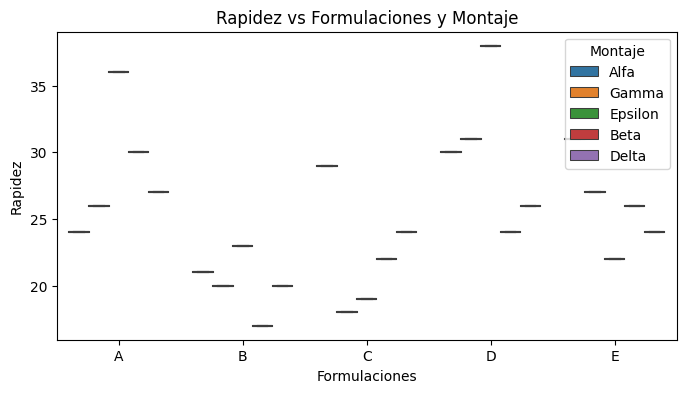

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rapidez vs Formulaciones y Montaje')
sns.boxplot(x="Formulaciones", y="Rapidez", hue='Montaje', data=DCGL, ax=ax);

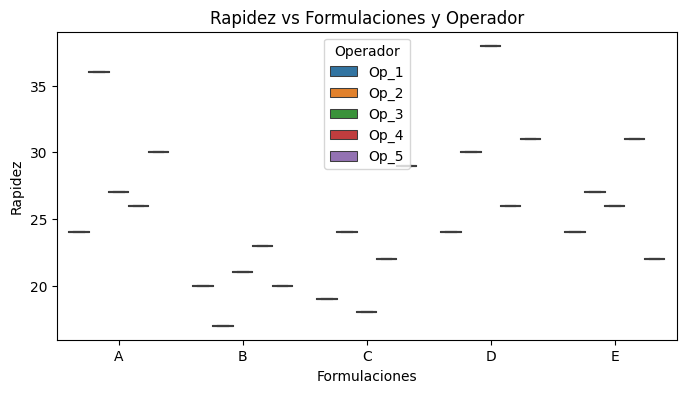

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rapidez vs Formulaciones y Operador')
sns.boxplot(x="Formulaciones", y="Rapidez", hue='Operador', data=DCGL, ax=ax);

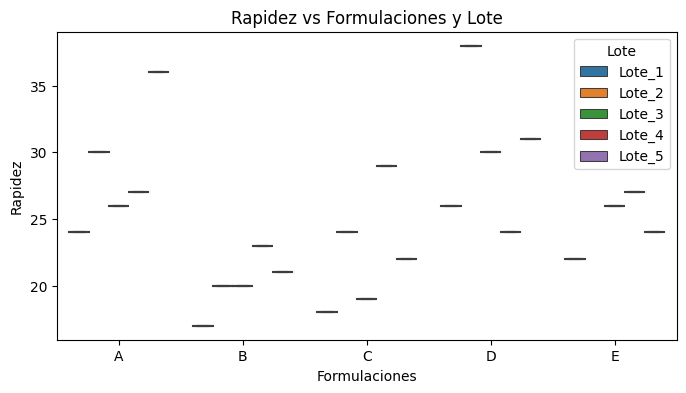

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rapidez vs Formulaciones y Lote')
sns.boxplot(x="Formulaciones", y="Rapidez", hue='Lote', data=DCGL, ax=ax);

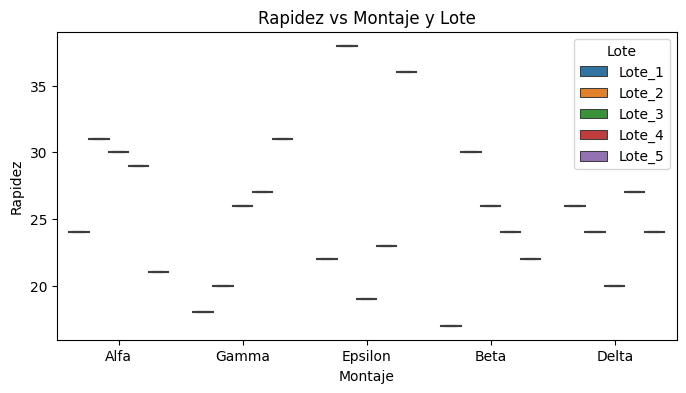

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rapidez vs Montaje y Lote')
sns.boxplot(x="Montaje", y="Rapidez", hue='Lote', data=DCGL, ax=ax);

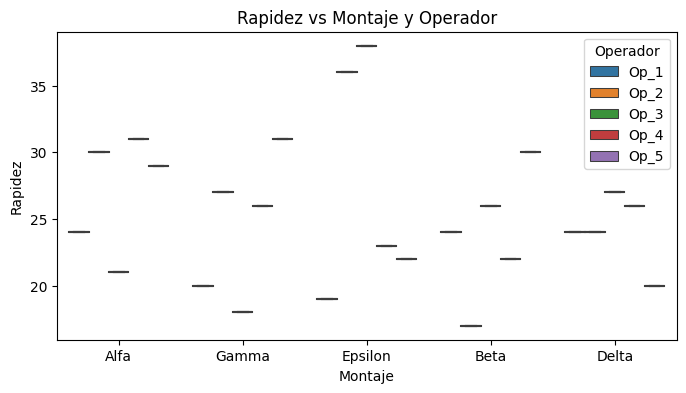

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rapidez vs Montaje y Operador')
sns.boxplot(x="Montaje", y="Rapidez", hue='Operador', data=DCGL, ax=ax);

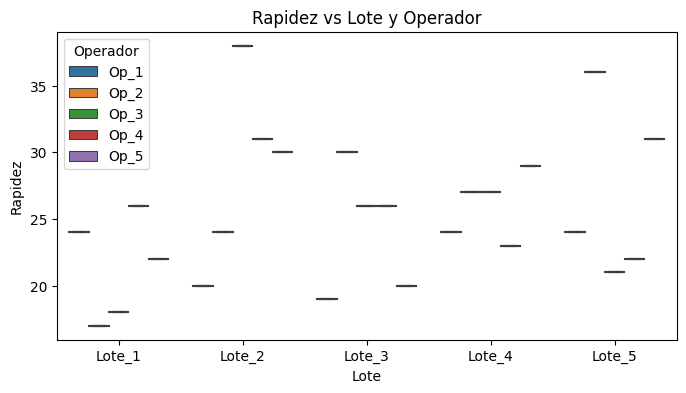

In [ ]:
## **5.6 Diagrama Bivariado  es sposible dado que  hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Rapidez vs Lote y Operador')
sns.boxplot(x="Lote", y="Rapidez", hue='Operador', data=DCGL, ax=ax);

## **5.7 Análisis de Varianza Tipo II**

In [ ]:
# **4.7 Análisis de Varianza Tipo II**
modeloDCGL = ols("Rapidez ~ Formulaciones + Montaje+Operador+Lote", data = DCGL).fit()
anova_result2 = sm.stats.anova_lm(modeloDCGL, typ=1)
print (anova_result2)

                df  sum_sq  mean_sq          F    PR(>F)
Formulaciones  4.0   330.0    82.50  10.000000  0.003344
Montaje        4.0    62.0    15.50   1.878788  0.207641
Operador       4.0    68.0    17.00   2.060606  0.178311
Lote           4.0   150.0    37.50   4.545455  0.032930
Residual       8.0    66.0     8.25        NaN       NaN


In [ ]:
anova_result2

,df,sum_sq,mean_sq,F,PR(>F)
Formulaciones,4.0,330.0,82.50,10.000000,0.003344
Montaje,4.0,62.0,15.50,1.878788,0.207641
Operador,4.0,68.0,17.00,2.060606,0.178311
Lote,4.0,150.0,37.50,4.545455,0.032930
Residual,8.0,66.0,8.25,NaN,NaN


In [ ]:
print(modeloDCGL.summary())

                            OLS Regression Results                            
Dep. Variable:                Rapidez   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     4.621
Date:                Tue, 31 Oct 2023   Prob (F-statistic):             0.0171
Time:                        18:32:35   Log-Likelihood:                -47.608
No. Observations:                  25   AIC:                             129.2
Df Residuals:                       8   BIC:                             149.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.0000      2

In [ ]:
# **4.7 Análisis de Varianza Tipo IiI**
modeloDCL = ols("Rapidez ~ Formulaciones + Montaje+Operador+Lote", data = DCGL).fit()
anova_result3 = sm.stats.anova_lm(modeloDCL, typ=3)
print (anova_result3)

                   sum_sq   df          F    PR(>F)
Intercept      777.941176  1.0  94.295900  0.000011
Formulaciones  330.000000  4.0  10.000000  0.003344
Montaje         62.000000  4.0   1.878788  0.207641
Operador        68.000000  4.0   2.060606  0.178311
Lote           150.000000  4.0   4.545455  0.032930
Residual        66.000000  8.0        NaN       NaN


## **5.9 Comparaciones Múltiples:DCL - TGP**
### **a. Comparaciones Múltiples: TGP VS VITAMINAS**

group1,group2,meandiff,p-adj,lower,upper,reject
Alfa,Beta,-3.2,0.8885,-13.6861,7.2861,False
Alfa,Delta,-2.8,0.9278,-13.2861,7.6861,False
Alfa,Epsilon,0.6,0.9998,-9.8861,11.0861,False
Alfa,Gamma,-2.6,0.9439,-13.0861,7.8861,False
Beta,Delta,0.4,1.0,-10.0861,10.8861,False
Beta,Epsilon,3.8,0.8123,-6.6861,14.2861,False
Beta,Gamma,0.6,0.9998,-9.8861,11.0861,False
Delta,Epsilon,3.4,0.8653,-7.0861,13.8861,False
Delta,Gamma,0.2,1.0,-10.2861,10.6861,False
Epsilon,Gamma,-3.2,0.8885,-13.6861,7.2861,False


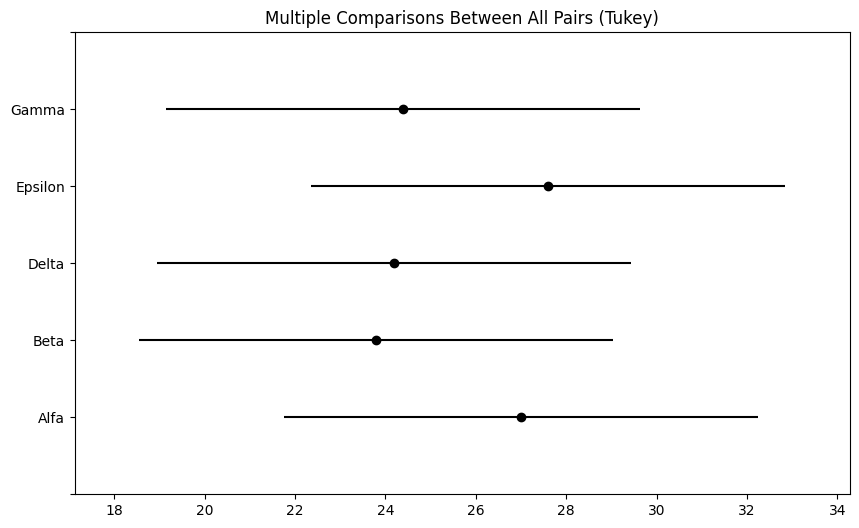

In [ ]:
### **a. Comparaciones Múltiples: TGP VS VITAMINAS**
tukey = pairwise_tukeyhsd(endog=DCGL["Rapidez"],     # Data
                          groups=DCGL["Montaje"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **b. Comparaciones Múltiples: TGP VS Razas**

group1,group2,meandiff,p-adj,lower,upper,reject
Alfa,Beta,-3.2,0.8885,-13.6861,7.2861,False
Alfa,Delta,-2.8,0.9278,-13.2861,7.6861,False
Alfa,Epsilon,0.6,0.9998,-9.8861,11.0861,False
Alfa,Gamma,-2.6,0.9439,-13.0861,7.8861,False
Beta,Delta,0.4,1.0,-10.0861,10.8861,False
Beta,Epsilon,3.8,0.8123,-6.6861,14.2861,False
Beta,Gamma,0.6,0.9998,-9.8861,11.0861,False
Delta,Epsilon,3.4,0.8653,-7.0861,13.8861,False
Delta,Gamma,0.2,1.0,-10.2861,10.6861,False
Epsilon,Gamma,-3.2,0.8885,-13.6861,7.2861,False


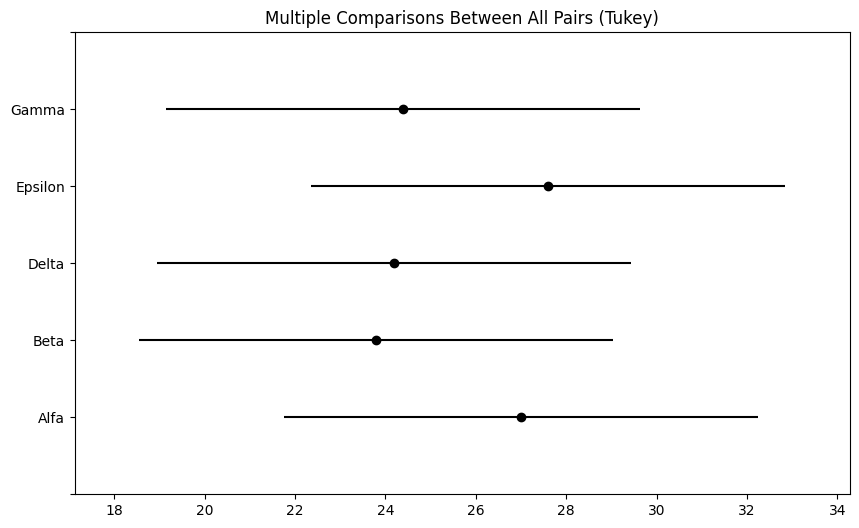

In [ ]:
### **b. Comparaciones Múltiples: TGP VS Razas**
tukey = pairwise_tukeyhsd(endog=DCGL["Rapidez"],     # Data
                          groups=DCGL["Montaje"],   # Groups
                          alpha=0.05)           # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **c. Comparaciones Múltiples: TGP VS Patologías**

group1,group2,meandiff,p-adj,lower,upper,reject
Op_1,Op_2,4.6,0.683,-5.8348,15.0348,False
Op_1,Op_3,3.8,0.8097,-6.6348,14.2348,False
Op_1,Op_4,3.4,0.8632,-7.0348,13.8348,False
Op_1,Op_5,4.2,0.7489,-6.2348,14.6348,False
Op_2,Op_3,-0.8,0.9993,-11.2348,9.6348,False
Op_2,Op_4,-1.2,0.9967,-11.6348,9.2348,False
Op_2,Op_5,-0.4,1.0,-10.8348,10.0348,False
Op_3,Op_4,-0.4,1.0,-10.8348,10.0348,False
Op_3,Op_5,0.4,1.0,-10.0348,10.8348,False
Op_4,Op_5,0.8,0.9993,-9.6348,11.2348,False


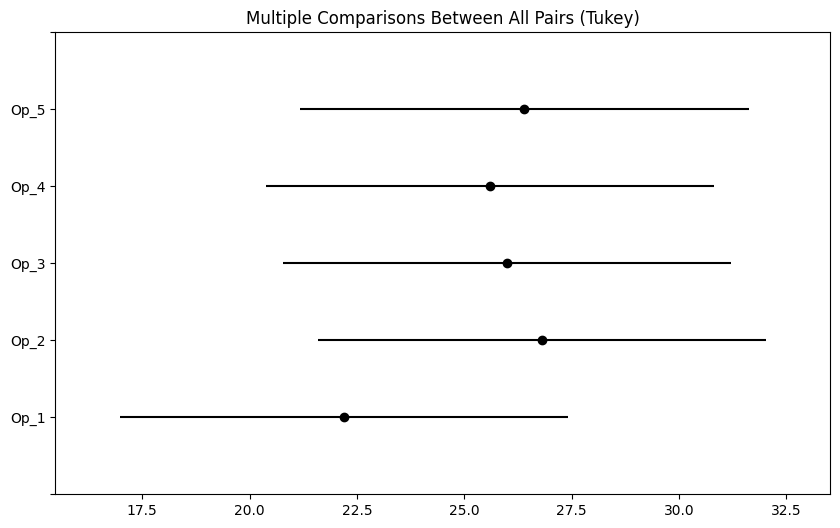

In [ ]:
### **c. Comparaciones Múltiples: TGP VS Patologías**
tukey = pairwise_tukeyhsd(endog=DCGL["Rapidez"],     # Data
                          groups=DCGL["Operador"],   # Groups
                          alpha=0.05)           # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **d. Comparaciones Múltiples: TGP VS Patologías**

group1,group2,meandiff,p-adj,lower,upper,reject
Lote_1,Lote_2,7.2,0.2129,-2.5056,16.9056,False
Lote_1,Lote_3,2.8,0.9069,-6.9056,12.5056,False
Lote_1,Lote_4,4.6,0.6236,-5.1056,14.3056,False
Lote_1,Lote_5,5.4,0.4762,-4.3056,15.1056,False
Lote_2,Lote_3,-4.4,0.6607,-14.1056,5.3056,False
Lote_2,Lote_4,-2.6,0.9271,-12.3056,7.1056,False
Lote_2,Lote_5,-1.8,0.98,-11.5056,7.9056,False
Lote_3,Lote_4,1.8,0.98,-7.9056,11.5056,False
Lote_3,Lote_5,2.6,0.9271,-7.1056,12.3056,False
Lote_4,Lote_5,0.8,0.9991,-8.9056,10.5056,False


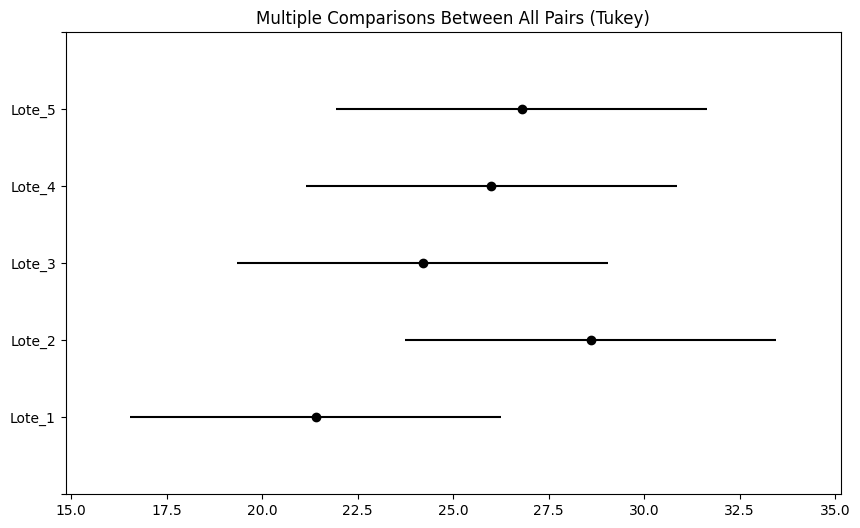

In [ ]:
### **d. Comparaciones Múltiples: TGP VS Patologías**
tukey = pairwise_tukeyhsd(endog=DCGL["Rapidez"],     # Data
                          groups=DCGL["Lote"],   # Groups
                          alpha=0.05)           # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **e. Comparaciones Múltiples Forma 2**

In [ ]:
# **e. Comparaciones Múltiples Forma 2**
pg.pairwise_ttests(
    dv      = 'Rapidez',
    within  = 'Formulaciones',
    subject = 'Montaje',
    padjust = 'holm',
    data    = DCGL
)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Formulaciones,A,B,True,True,4.221159,4.0,two-sided,0.013465,0.121186,holm,5.686,2.084336
1,Formulaciones,A,C,True,True,1.723553,4.0,two-sided,0.159884,0.799420,holm,0.987,1.235328
2,Formulaciones,A,D,True,True,-0.551178,4.0,two-sided,0.610850,1.000000,holm,0.449,-0.214638
3,Formulaciones,A,E,True,True,0.754972,4.0,two-sided,0.492281,1.000000,holm,0.497,0.575523
4,Formulaciones,B,C,True,True,-0.979958,4.0,two-sided,0.382592,1.000000,holm,0.569,-0.573625
5,Formulaciones,B,D,True,True,-6.000000,4.0,two-sided,0.003883,0.038825,holm,13.991,-2.106118
6,Formulaciones,B,E,True,True,-2.921998,4.0,two-sided,0.043157,0.345258,holm,2.464,-1.840695
7,Formulaciones,C,D,True,True,-2.032170,4.0,two-sided,0.111936,0.671616,holm,1.259,-1.357289
8,Formulaciones,C,E,True,True,-2.394684,4.0,two-sided,0.074786,0.523505,holm,1.669,-0.828588
9,Formulaciones,D,E,True,True,1.176070,4.0,two-sided,0.304782,1.000000,holm,0.651,0.760848


## **5.10 Supuestos del Modelo**
# **a. Forma 1. Shapiro Wilks**

In [ ]:
# **a. Forma 1. Shapiro Wilks**
stats.shapiro(modeloDCGL.resid)

ShapiroResult(statistic=0.9796741008758545, pvalue=0.8785701394081116)

# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

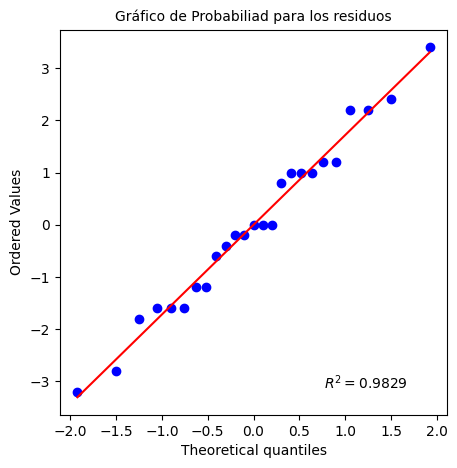

In [ ]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDCGL.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **e. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [ ]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=DCGL, res_var='Rapidez', xfac_var='Formulaciones')
table_leve = res.levene_summary
# output

print(f'El valor critico Levene es {round(table_leve.Value[0],3)} y el valor p = {round(table_leve.Value[2],1)*100}% > 5%')


El valor critico Levene es 0.586 y el valor p = 70.0% > 5%


In [ ]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=DCGL, res_var='Rapidez', xfac_var='Operador')
table_leve = res.levene_summary
# output

print(f'El valor critico Levene es {round(table_leve.Value[0],3)} y el valor p = {round(table_leve.Value[2],1)*100}% > 5%')


El valor critico Levene es 0.82 y el valor p = 50.0% > 5%


In [ ]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=DCGL, res_var='Rapidez', xfac_var='Lote')
table_leve = res.levene_summary
# output

print(f'El valor critico Levene es {round(table_leve.Value[0],3)} y el valor p = {round(table_leve.Value[2],1)*100}% > 5%')


El valor critico Levene es 0.737 y el valor p = 60.0% > 5%


In [ ]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=DCGL, res_var='Rapidez', xfac_var='Montaje')
table_leve = res.levene_summary
# output

print(f'El valor critico Levene es {round(table_leve.Value[0],3)} y el valor p = {round(table_leve.Value[2],1)*100}% > 5%')


El valor critico Levene es 0.939 y el valor p = 50.0% > 5%


In [ ]:
## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=DCGL, res_var='Rapidez', xfac_var='Formulaciones')
Barlet_t = res.bartlett_summary


print(f'El valor critico Levene es {round(Barlet_t.Value[0],3)} y el valor p = {round(Barlet_t.Value[2],1)*100}% > 5%')


El valor critico Levene es 3.082 y el valor p = 50.0% > 5%


In [ ]:
## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=DCGL, res_var='Rapidez', xfac_var='Operador')
Barlet_t = res.bartlett_summary


print(f'El valor critico Levene es {round(Barlet_t.Value[0],3)} y el valor p = {round(Barlet_t.Value[2],1)*100}% > 5%')


El valor critico Levene es 5.572 y el valor p = 20.0% > 5%


In [ ]:
## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=DCGL, res_var='Rapidez', xfac_var='Lote')
Barlet_t = res.bartlett_summary


print(f'El valor critico Levene es {round(Barlet_t.Value[0],3)} y el valor p = {round(Barlet_t.Value[2],1)*100}% > 5%')


El valor critico Levene es 4.4 y el valor p = 40.0% > 5%


In [ ]:
## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=DCGL, res_var='Rapidez', xfac_var='Montaje')
Barlet_t = res.bartlett_summary


print(f'El valor critico Levene es {round(Barlet_t.Value[0],3)} y el valor p = {round(Barlet_t.Value[2],1)*100}% > 5%')


El valor critico Levene es 5.119 y el valor p = 30.0% > 5%
